In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler


In [2]:
#load data:
crime=pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.columns=('State','Murder','Assault','Urbanpop','Rape')

In [4]:
crime.head()


,State,Murder,Assault,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   Urbanpop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.shape

(50, 5)

#Kmeans:


In [7]:
#Normalization
Scaler=StandardScaler()
Scaler1=Scaler.fit_transform(crime.iloc[:,1:])


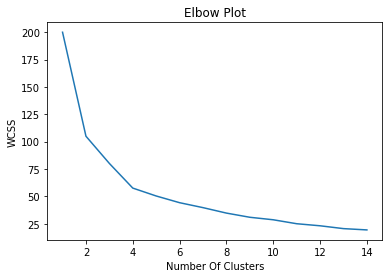

In [8]:
#Data Visualization:
wcss = []                                        
                                            
                                    
for x in range(1,15):                       
    kmeans = KMeans(n_clusters=x, random_state=0)
    kmeans.fit(Scaler1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#Model:
Model=KMeans(n_clusters=6,random_state=0)
Model.fit(Scaler1)

KMeans(n_clusters=6, random_state=0)

In [10]:
Model.labels_

array([5, 4, 1, 0, 1, 1, 2, 0, 1, 5, 2, 3, 1, 0, 3, 0, 0, 5, 3, 1, 2, 1,
       3, 5, 0, 3, 3, 1, 3, 2, 1, 1, 5, 3, 2, 0, 0, 2, 2, 5, 3, 5, 1, 2,
       3, 0, 2, 3, 3, 0])

In [11]:
C1=pd.DataFrame(Model.labels_,columns=['km_clust_id'])
C1.head()

,km_clust_id
0,5
1,4
2,1
3,0
4,1


In [12]:
#Joining:
join=crime.copy(deep=True)
C2=pd.concat([C1,join],axis=1)
C2

,km_clust_id,State,Murder,Assault,Urbanpop,Rape
0,5,Alabama,13.2,236,58,21.2
1,4,Alaska,10.0,263,48,44.5
2,1,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,40.6
5,1,Colorado,7.9,204,78,38.7
6,2,Connecticut,3.3,110,77,11.1
7,0,Delaware,5.9,238,72,15.8
8,1,Florida,15.4,335,80,31.9
9,5,Georgia,17.4,211,60,25.8


In [13]:
C2.groupby('km_clust_id').mean().sort_values(by='Murder')

,Murder,Assault,Urbanpop,Rape
km_clust_id,,,,
3,3.091667,76.000000,52.083333,11.833333
2,4.955556,125.444444,80.111111,17.788889
0,7.340000,157.000000,63.300000,20.440000
4,10.000000,263.000000,48.000000,44.500000
1,11.054545,264.090909,79.090909,32.618182
5,14.671429,251.285714,54.285714,21.685714


In [14]:
C2.groupby('km_clust_id').median().sort_values(by='Murder')

,Murder,Assault,Urbanpop,Rape
km_clust_id,,,,
3,2.6,76.5,53.5,11.25
2,4.4,120.0,80.0,18.80
0,7.0,157.5,65.5,19.75
4,10.0,263.0,48.0,44.50
1,11.3,255.0,80.0,31.90
5,14.4,249.0,58.0,22.20


Inference:
    Among all clusters,cluster3 have lowest murder rate with urban population. On the hand,cluster5 has highest murder rate with less urban population. 

In [15]:
#Hierarchial Clustering:
crime.head()

,State,Murder,Assault,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
crime.drop(['State'],axis=1,inplace=True)

In [17]:
crime.head()

,Murder,Assault,Urbanpop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [18]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
    

In [19]:
cbc=norm_func(crime.iloc[:,1:])

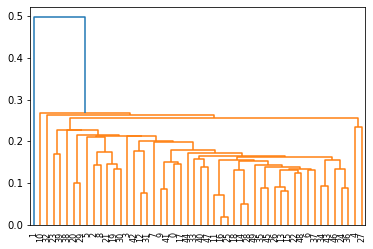

In [20]:
#EDA:
Diagram1=sch.dendrogram(sch.linkage(cbc,method='single'))

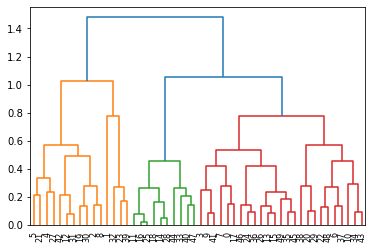

In [21]:
Diagram2=sch.dendrogram(sch.linkage(cbc,method='complete'))

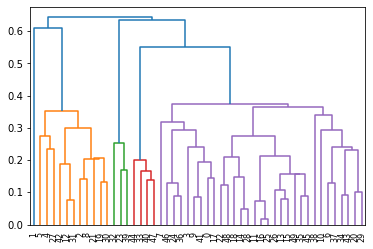

In [22]:
Diagram3=sch.dendrogram(sch.linkage(cbc,method='centroid'))

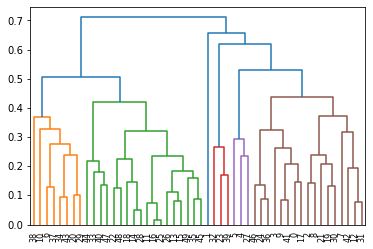

In [23]:
Diagram4=sch.dendrogram(sch.linkage(cbc,method='average'))

In [24]:
#Model
Model1=AgglomerativeClustering(n_clusters=5,affinity = 'euclidean',linkage='complete')

In [25]:
Predict=Model1.fit_predict(cbc)
clusters= pd.DataFrame(Predict, columns = ['hir_clust_id'])

In [26]:
clusters

,hir_clust_id
0,0
1,4
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [27]:
C5=pd.concat((clusters,C2),axis=1)
C5.sort_values(by='hir_clust_id')

,hir_clust_id,km_clust_id,State,Murder,Assault,Urbanpop,Rape
0,0,5,Alabama,13.2,236,58,21.2
46,0,2,Washington,4.0,145,73,26.2
45,0,0,Virginia,8.5,156,63,20.7
43,0,2,Utah,3.2,120,80,22.9
41,0,5,Tennessee,13.2,188,59,26.9
38,0,2,Rhode Island,3.4,174,87,8.3
37,0,2,Pennsylvania,6.3,106,72,14.9
36,0,0,Oregon,4.9,159,67,29.3
35,0,0,Oklahoma,6.6,151,68,20.0
34,0,2,Ohio,7.3,120,75,21.4


In [28]:
C5.groupby('hir_clust_id').mean().sort_values(by='Murder')

,km_clust_id,Murder,Assault,Urbanpop,Rape
hir_clust_id,,,,,
2,2.70,3.720000,79.400000,48.300000,11.610000
0,1.88,7.084000,148.040000,69.560000,19.460000
4,4.00,10.000000,263.000000,48.000000,44.500000
1,1.00,11.054545,264.090909,79.090909,32.618182
3,5.00,14.500000,291.666667,45.666667,18.566667


In [29]:
C5.groupby('hir_clust_id').median().sort_values(by='Murder')

,km_clust_id,Murder,Assault,Urbanpop,Rape
hir_clust_id,,,,,
2,3,2.4,82.0,51.5,11.25
0,2,6.3,151.0,67.0,20.00
4,4,10.0,263.0,48.0,44.50
1,1,11.3,255.0,80.0,31.90
3,5,14.4,279.0,45.0,17.10


#Inference:
hir_clust_id-2 and km_clust_id-3 have lowest murder rate with lowest urban population.on the other hand,hir_clust_id-3 and km_clust_id-5 have highest murder rate with high urban population.

In [30]:
#DBSCAN:
crime.head()

,Murder,Assault,Urbanpop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [31]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [32]:
hk=StandardScaler()
km=hk.fit_transform(array)
km

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [35]:
Model3=DBSCAN(eps=1.2,min_samples=6)
Model4=Model3.fit(km)
Model4.labels_


array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [39]:
C8=pd.DataFrame(Model4.labels_,columns=['d_bscan_id'])
C8

,d_bscan_id
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,0
8,-1
9,-1


In [42]:
#Adding
C10=pd.concat((C8,C5),axis=1)

In [43]:
C10

,d_bscan_id,hir_clust_id,km_clust_id,State,Murder,Assault,Urbanpop,Rape
0,-1,0,5,Alabama,13.2,236,58,21.2
1,-1,4,4,Alaska,10.0,263,48,44.5
2,-1,1,1,Arizona,8.1,294,80,31.0
3,0,0,0,Arkansas,8.8,190,50,19.5
4,-1,1,1,California,9.0,276,91,40.6
5,-1,1,1,Colorado,7.9,204,78,38.7
6,0,0,2,Connecticut,3.3,110,77,11.1
7,0,0,0,Delaware,5.9,238,72,15.8
8,-1,1,1,Florida,15.4,335,80,31.9
9,-1,0,5,Georgia,17.4,211,60,25.8


In [45]:
C10.groupby('d_bscan_id').mean().sort_values(by='Murder')

,hir_clust_id,km_clust_id,Murder,Assault,Urbanpop,Rape
d_bscan_id,,,,,,
0,0.656250,1.718750,5.243750,119.125000,64.343750,16.625000
-1,1.277778,2.722222,12.311111,262.555556,67.666667,29.422222


In [47]:
C10.groupby('d_bscan_id').median().sort_values(by='Murder')

,hir_clust_id,km_clust_id,Murder,Assault,Urbanpop,Rape
d_bscan_id,,,,,,
0,0.0,2,5.10,114.0,66.0,16.30
-1,1.0,1,12.15,257.0,68.5,27.35


In [48]:
C10.groupby('km_clust_id').median().sort_values(by='Murder')

,d_bscan_id,hir_clust_id,Murder,Assault,Urbanpop,Rape
km_clust_id,,,,,,
3,0.0,2.0,2.6,76.5,53.5,11.25
2,0.0,0.0,4.4,120.0,80.0,18.80
0,0.0,0.0,7.0,157.5,65.5,19.75
4,-1.0,4.0,10.0,263.0,48.0,44.50
1,-1.0,1.0,11.3,255.0,80.0,31.90
5,-1.0,0.0,14.4,249.0,58.0,22.20


In [49]:
C10.groupby('hir_clust_id').median().sort_values(by='Murder')

,d_bscan_id,km_clust_id,Murder,Assault,Urbanpop,Rape
hir_clust_id,,,,,,
2,0.0,3,2.4,82.0,51.5,11.25
0,0.0,2,6.3,151.0,67.0,20.00
4,-1.0,4,10.0,263.0,48.0,44.50
1,-1.0,1,11.3,255.0,80.0,31.90
3,-1.0,5,14.4,279.0,45.0,17.10


In [ ]:
Inferences:
DBSCAN not properly with small dataset. It has divided data sets in two groups that is outliers and other valid groups.
While KMeans and Hirarchical Clustering gives almost same results. Mean and Median very simalar to distinct groups.

Final Inferences:
KMeans and Hirarchical Clustering Methods predicted one cluster with low crime rate.
​